<a href="https://colab.research.google.com/github/beamconan/ML/blob/master/LAB_3_To.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB_3

### ตอนที่ 1: การทดลองเตรียมข้อมูล ปรับค่าข้อมูล และจัดแบ่งชุด Train, Test เพื่อสอนโมเดล 

### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
import seaborn as sns

In [2]:
data_bj  = pd.read_csv('./pm-25-data/BeijingPM20100101_20151231.csv')
data_cd = pd.read_csv('./pm-25-data/ChengduPM20100101_20151231.csv')
data_bj
data_cd

,No,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,4.0,81.20,1022.0,7.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,4.0,86.99,1022.0,6.0,cv,1.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,4.0,86.99,1021.0,6.0,cv,1.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,3.0,86.89,1021.0,5.0,cv,1.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,2.0,86.79,1021.0,4.0,cv,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,176.0,225.0,262.0,7.0,87.28,1027.0,9.0,NW,2.0,0.0,0.0
52580,52581,2015,12,31,20,4,146.0,181.0,218.0,7.0,87.28,1028.0,9.0,NW,4.0,0.0,0.0
52581,52582,2015,12,31,21,4,162.0,175.0,213.0,7.0,87.28,1028.0,9.0,cv,1.0,0.0,0.0
52582,52583,2015,12,31,22,4,169.0,192.0,236.0,7.0,93.40,1028.0,8.0,NW,2.0,0.0,0.0


In [3]:
df_bj= pd.DataFrame(data_bj,columns=['HUMI','PRES','Iws','Iprec'])
df_cd= pd.DataFrame(data_cd,columns=['HUMI','PRES','Iws','Iprec'])
df_bj

,HUMI,PRES,Iws,Iprec
0,43.0,1021.0,1.79,0.0
1,47.0,1020.0,4.92,0.0
2,43.0,1019.0,6.71,0.0
3,55.0,1019.0,9.84,0.0
4,51.0,1018.0,12.97,0.0
...,...,...,...,...
52579,68.0,1031.0,7.14,0.0
52580,63.0,1030.0,8.03,0.0
52581,73.0,1030.0,0.89,0.0
52582,73.0,1030.0,1.78,0.0


In [4]:
date_bj = pd.to_datetime(pd.DataFrame(data_bj,columns=['year','month','day','hour']))
date_bj

0       2010-01-01 00:00:00
1       2010-01-01 01:00:00
2       2010-01-01 02:00:00
3       2010-01-01 03:00:00
4       2010-01-01 04:00:00
                ...        
52579   2015-12-31 19:00:00
52580   2015-12-31 20:00:00
52581   2015-12-31 21:00:00
52582   2015-12-31 22:00:00
52583   2015-12-31 23:00:00
Length: 52584, dtype: datetime64[ns]

In [5]:
date_cd = pd.to_datetime(pd.DataFrame(data_cd,columns=['year','month','day','hour']))
date_cd

0       2010-01-01 00:00:00
1       2010-01-01 01:00:00
2       2010-01-01 02:00:00
3       2010-01-01 03:00:00
4       2010-01-01 04:00:00
                ...        
52579   2015-12-31 19:00:00
52580   2015-12-31 20:00:00
52581   2015-12-31 21:00:00
52582   2015-12-31 22:00:00
52583   2015-12-31 23:00:00
Length: 52584, dtype: datetime64[ns]

In [6]:
def pm2_5_level(df):
    if df['PM_US Post']<10:
        return 0
    elif df['PM_US Post'] <= 25:
        return 1
    elif df['PM_US Post'] > 25:
        return 2
    else: 
        return np.nan

In [7]:
def label_count(df):
    np = df['PM2.5_level'].to_numpy()
    count = [0,0,0,0]
    for i in (np):
        if i == 0:
            count[0] += 1
        elif i == 1:
            count[1] += 1
        elif i == 2:
            count[2] += 1
        else:
            count[3]+=1
    return count

In [8]:
df_pm_us_bj = pd.DataFrame(data_bj,columns=['PM_US Post'])
df_pm_25_bj = df_pm_us_bj.apply(lambda df_pm_us_bj:pm2_5_level(df_pm_us_bj),axis=1)
df_pm_25_bj

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
52579    2.0
52580    2.0
52581    2.0
52582    2.0
52583    2.0
Length: 52584, dtype: float64

In [9]:
df_pm_us_cd = pd.DataFrame(data_cd,columns=['PM_US Post'])
df_pm_25_cd = df_pm_us_cd.apply(lambda df_pm_us_cd:pm2_5_level(df_pm_us_cd),axis=1)
df_pm_25_bj

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
52579    2.0
52580    2.0
52581    2.0
52582    2.0
52583    2.0
Length: 52584, dtype: float64

In [10]:
df_bj['Time'] = date_cd
df_bj['PM_US Post'] = pd.DataFrame(data_cd,columns=['PM_US Post'])
df_bj['PM2.5_level'] =  df_pm_25_bj
df_bj = df_bj[['Time', 'HUMI','PRES','Iws','Iprec','PM_US Post','PM2.5_level']]
df_bj

,Time,HUMI,PRES,Iws,Iprec,PM_US Post,PM2.5_level
0,2010-01-01 00:00:00,43.0,1021.0,1.79,0.0,NaN,NaN
1,2010-01-01 01:00:00,47.0,1020.0,4.92,0.0,NaN,NaN
2,2010-01-01 02:00:00,43.0,1019.0,6.71,0.0,NaN,NaN
3,2010-01-01 03:00:00,55.0,1019.0,9.84,0.0,NaN,NaN
4,2010-01-01 04:00:00,51.0,1018.0,12.97,0.0,NaN,NaN
...,...,...,...,...,...,...,...
52579,2015-12-31 19:00:00,68.0,1031.0,7.14,0.0,262.0,2.0
52580,2015-12-31 20:00:00,63.0,1030.0,8.03,0.0,218.0,2.0
52581,2015-12-31 21:00:00,73.0,1030.0,0.89,0.0,213.0,2.0
52582,2015-12-31 22:00:00,73.0,1030.0,1.78,0.0,236.0,2.0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


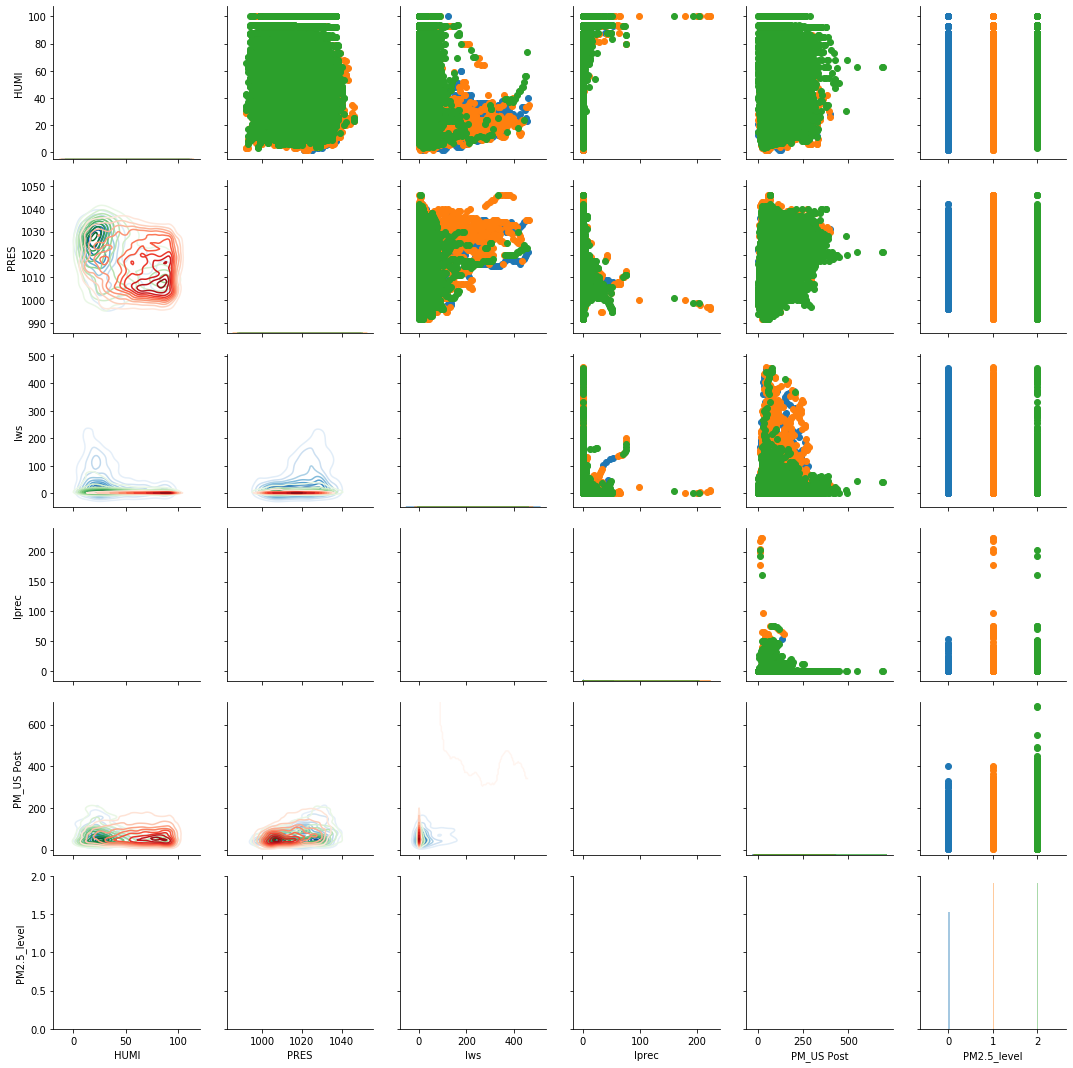

In [12]:
df_bj_drop = df_bj.dropna()
g = sns.PairGrid(df_bj_drop,hue='PM2.5_level',hue_kws={"cmap":['Blues','Greens','Reds','Purples']},dropna=True)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.distplot)

In [13]:
df_cd['Time'] = date_cd
df_cd['PM_US Post'] = pd.DataFrame(data_cd,columns=['PM_US Post'])
df_cd['PM2.5_level'] =  df_pm_25_cd
df_cd = df_cd[['Time', 'HUMI','PRES','Iws','Iprec','PM_US Post','PM2.5_level']]
df_cd

,Time,HUMI,PRES,Iws,Iprec,PM_US Post,PM2.5_level
0,2010-01-01 00:00:00,81.20,1022.0,1.0,0.0,NaN,NaN
1,2010-01-01 01:00:00,86.99,1022.0,1.0,0.0,NaN,NaN
2,2010-01-01 02:00:00,86.99,1021.0,1.0,0.0,NaN,NaN
3,2010-01-01 03:00:00,86.89,1021.0,1.0,0.0,NaN,NaN
4,2010-01-01 04:00:00,86.79,1021.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
52579,2015-12-31 19:00:00,87.28,1027.0,2.0,0.0,262.0,2.0
52580,2015-12-31 20:00:00,87.28,1028.0,4.0,0.0,218.0,2.0
52581,2015-12-31 21:00:00,87.28,1028.0,1.0,0.0,213.0,2.0
52582,2015-12-31 22:00:00,93.40,1028.0,2.0,0.0,236.0,2.0


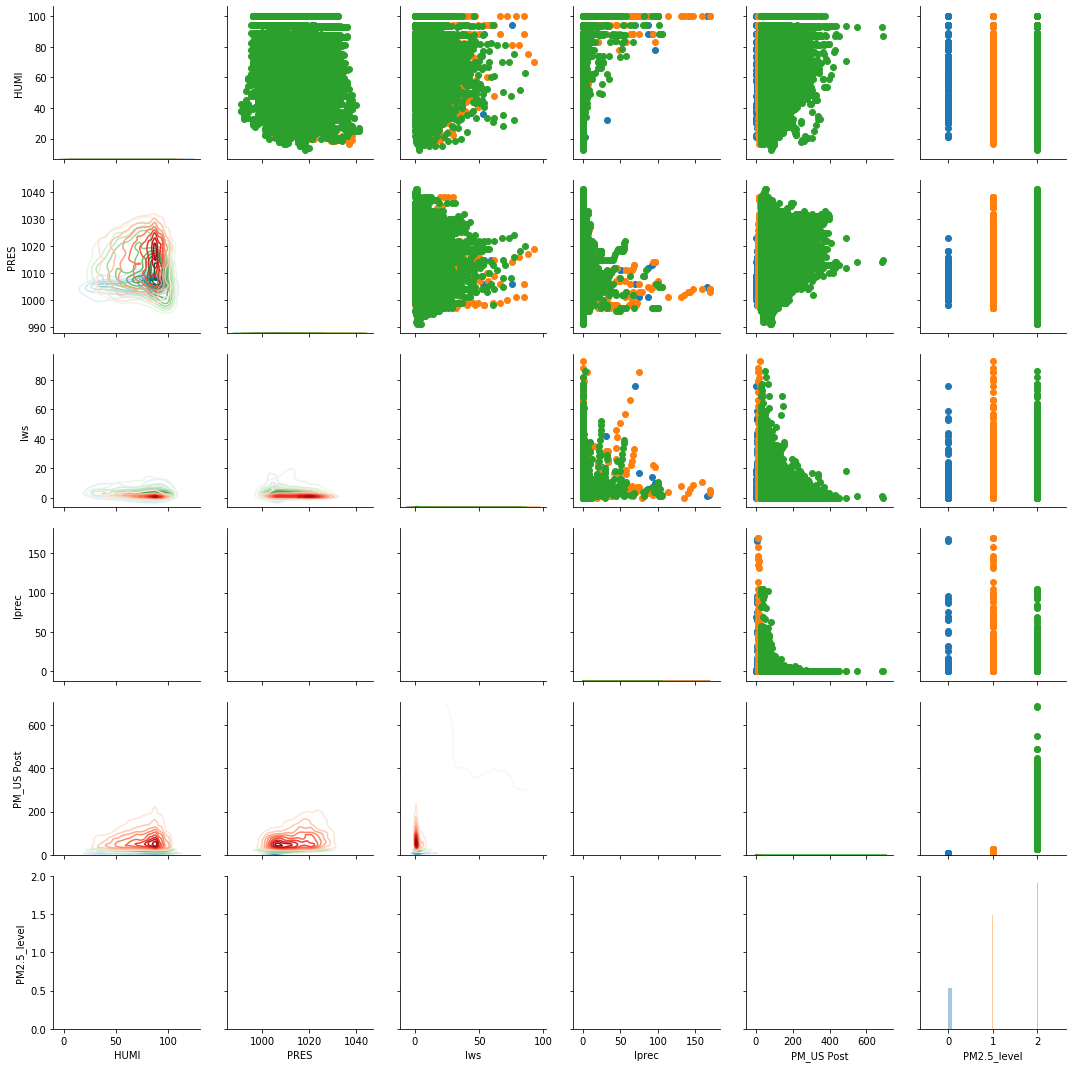

In [14]:
df_cd_drop = df_cd.dropna()
g = sns.PairGrid(df_cd_drop,hue='PM2.5_level',hue_kws={"cmap":['Blues','Greens','Reds','Purples']},dropna=True)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.distplot)

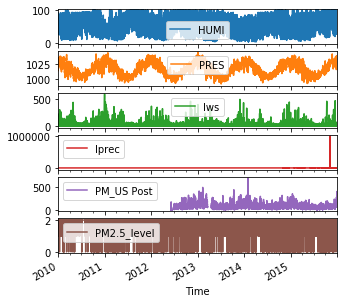

In [15]:
axes = df_bj.plot(x='Time', subplots=True, figsize=(5, 5))

In [16]:
df_bj[df_bj.columns[1:5]] = df_bj[df_bj.columns[1:5]].apply(pd.to_numeric, errors='coerce')
df_bj = df_bj.fillna(df_bj.median()) # จัดการข้อมูลหาย แทนที่ด้วย median
# df_bj = df_bj.dropna()
df_bj = df_bj.drop_duplicates()
df_bj['PM2.5_level'] = df_bj['PM2.5_level'].astype(int)
df_bj

,Time,HUMI,PRES,Iws,Iprec,PM_US Post,PM2.5_level
0,2010-01-01 00:00:00,43.0,1021.0,1.79,0.0,68.0,2
1,2010-01-01 01:00:00,47.0,1020.0,4.92,0.0,68.0,2
2,2010-01-01 02:00:00,43.0,1019.0,6.71,0.0,68.0,2
3,2010-01-01 03:00:00,55.0,1019.0,9.84,0.0,68.0,2
4,2010-01-01 04:00:00,51.0,1018.0,12.97,0.0,68.0,2
...,...,...,...,...,...,...,...
52579,2015-12-31 19:00:00,68.0,1031.0,7.14,0.0,262.0,2
52580,2015-12-31 20:00:00,63.0,1030.0,8.03,0.0,218.0,2
52581,2015-12-31 21:00:00,73.0,1030.0,0.89,0.0,213.0,2
52582,2015-12-31 22:00:00,73.0,1030.0,1.78,0.0,236.0,2


In [17]:
df_cd[df_cd.columns[1:5]] = df_cd[df_cd.columns[1:5]].apply(pd.to_numeric, errors='coerce')
df_cd = df_cd.fillna(df_bj.median())
# df_cd = df_cd.dropna()
df_cd = df_cd.drop_duplicates()
df_cd['PM2.5_level'] = df_cd['PM2.5_level'].astype(int)
df_cd

,Time,HUMI,PRES,Iws,Iprec,PM_US Post,PM2.5_level
0,2010-01-01 00:00:00,81.20,1022.0,1.0,0.0,68.0,2
1,2010-01-01 01:00:00,86.99,1022.0,1.0,0.0,68.0,2
2,2010-01-01 02:00:00,86.99,1021.0,1.0,0.0,68.0,2
3,2010-01-01 03:00:00,86.89,1021.0,1.0,0.0,68.0,2
4,2010-01-01 04:00:00,86.79,1021.0,1.0,0.0,68.0,2
...,...,...,...,...,...,...,...
52579,2015-12-31 19:00:00,87.28,1027.0,2.0,0.0,262.0,2
52580,2015-12-31 20:00:00,87.28,1028.0,4.0,0.0,218.0,2
52581,2015-12-31 21:00:00,87.28,1028.0,1.0,0.0,213.0,2
52582,2015-12-31 22:00:00,93.40,1028.0,2.0,0.0,236.0,2


In [18]:
def find_timediff(df):
    df['timediff'] = (df['Time']-df['Time'].shift().shift()).fillna(0)
    print('median timediff : ',df['timediff'].median())
    return df
find_timediff(df_bj)
find_timediff(df_cd)
df_bj

median timediff :  0 days 02:00:00
median timediff :  0 days 02:00:00


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  


,Time,HUMI,PRES,Iws,Iprec,PM_US Post,PM2.5_level,timediff
0,2010-01-01 00:00:00,43.0,1021.0,1.79,0.0,68.0,2,00:00:00
1,2010-01-01 01:00:00,47.0,1020.0,4.92,0.0,68.0,2,00:00:00
2,2010-01-01 02:00:00,43.0,1019.0,6.71,0.0,68.0,2,02:00:00
3,2010-01-01 03:00:00,55.0,1019.0,9.84,0.0,68.0,2,02:00:00
4,2010-01-01 04:00:00,51.0,1018.0,12.97,0.0,68.0,2,02:00:00
...,...,...,...,...,...,...,...,...
52579,2015-12-31 19:00:00,68.0,1031.0,7.14,0.0,262.0,2,02:00:00
52580,2015-12-31 20:00:00,63.0,1030.0,8.03,0.0,218.0,2,02:00:00
52581,2015-12-31 21:00:00,73.0,1030.0,0.89,0.0,213.0,2,02:00:00
52582,2015-12-31 22:00:00,73.0,1030.0,1.78,0.0,236.0,2,02:00:00


In [19]:
def resample_rolling(df):
    rule = '2H'
    df = df.set_index('Time').resample(rule).mean()
    df.sort_values('Time', inplace=True)
    df.interpolate(inplace=True)
    df = df.rolling(5).mean()
    
    df = df.reset_index()
    df = df.iloc[4:,:6]
    df['PM2.5_level'] = df.apply(lambda df:pm2_5_level(df),axis=1).astype(np.uint8)
    df = df[['Time','HUMI','PRES','Iws','Iprec','PM_US Post','PM2.5_level']]

    return df

In [20]:
df_bj = resample_rolling(df_bj)
df_bj

,Time,HUMI,PRES,Iws,Iprec,PM_US Post,PM2.5_level
4,2010-01-01 08:00:00,45.5,1018.2,14.401,0.0,68.0,2
5,2010-01-01 10:00:00,43.7,1017.5,20.303,0.0,68.0,2
6,2010-01-01 12:00:00,40.1,1016.7,26.473,0.0,68.0,2
7,2010-01-01 14:00:00,35.7,1016.0,28.037,0.0,68.0,2
8,2010-01-01 16:00:00,32.4,1015.6,24.459,0.0,68.0,2
...,...,...,...,...,...,...,...
26287,2015-12-31 14:00:00,51.1,1033.4,13.956,0.0,244.7,2
26288,2015-12-31 16:00:00,44.6,1032.7,11.584,0.0,255.3,2
26289,2015-12-31 18:00:00,43.7,1031.9,8.584,0.0,267.5,2
26290,2015-12-31 20:00:00,48.0,1030.9,4.019,0.0,266.4,2


In [21]:
df_cd = resample_rolling(df_cd)
df_cd

,Time,HUMI,PRES,Iws,Iprec,PM_US Post,PM2.5_level
4,2010-01-01 08:00:00,88.823,1020.90,1.0,0.0,68.0,2
5,2010-01-01 10:00:00,88.837,1020.70,1.0,0.0,68.0,2
6,2010-01-01 12:00:00,84.288,1020.40,1.3,0.0,68.0,2
7,2010-01-01 14:00:00,77.454,1019.68,1.4,0.0,68.0,2
8,2010-01-01 16:00:00,69.478,1019.06,1.6,0.0,68.0,2
...,...,...,...,...,...,...,...
26287,2015-12-31 14:00:00,88.123,1030.20,1.3,0.0,244.7,2
26288,2015-12-31 16:00:00,85.579,1029.50,2.0,0.0,255.3,2
26289,2015-12-31 18:00:00,85.579,1028.70,2.0,0.0,267.5,2
26290,2015-12-31 20:00:00,85.579,1027.90,2.2,0.0,266.4,2


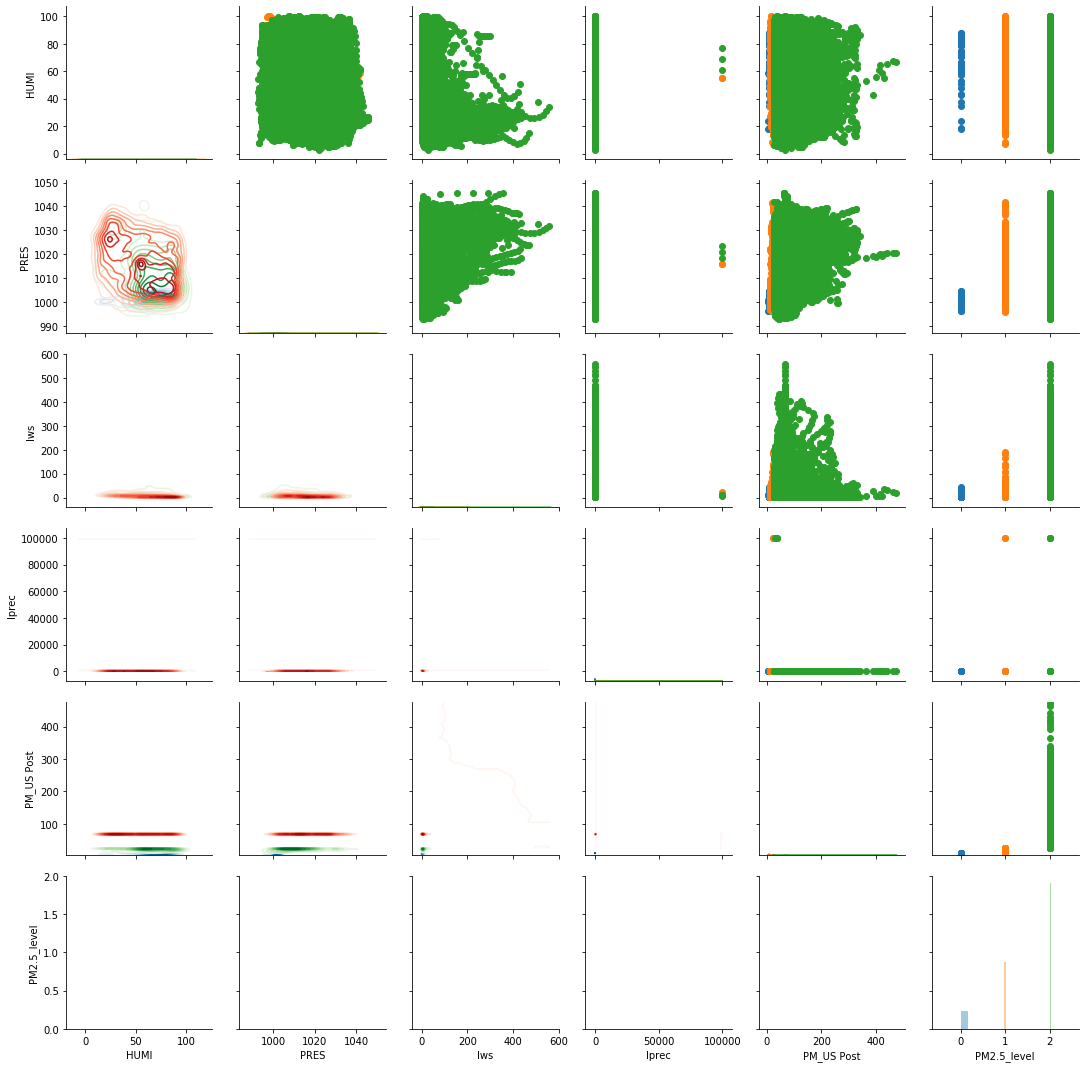

In [22]:
g = sns.PairGrid(df_bj,hue='PM2.5_level',hue_kws={"cmap":['Blues','Greens','Reds','Purples']})
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.distplot)

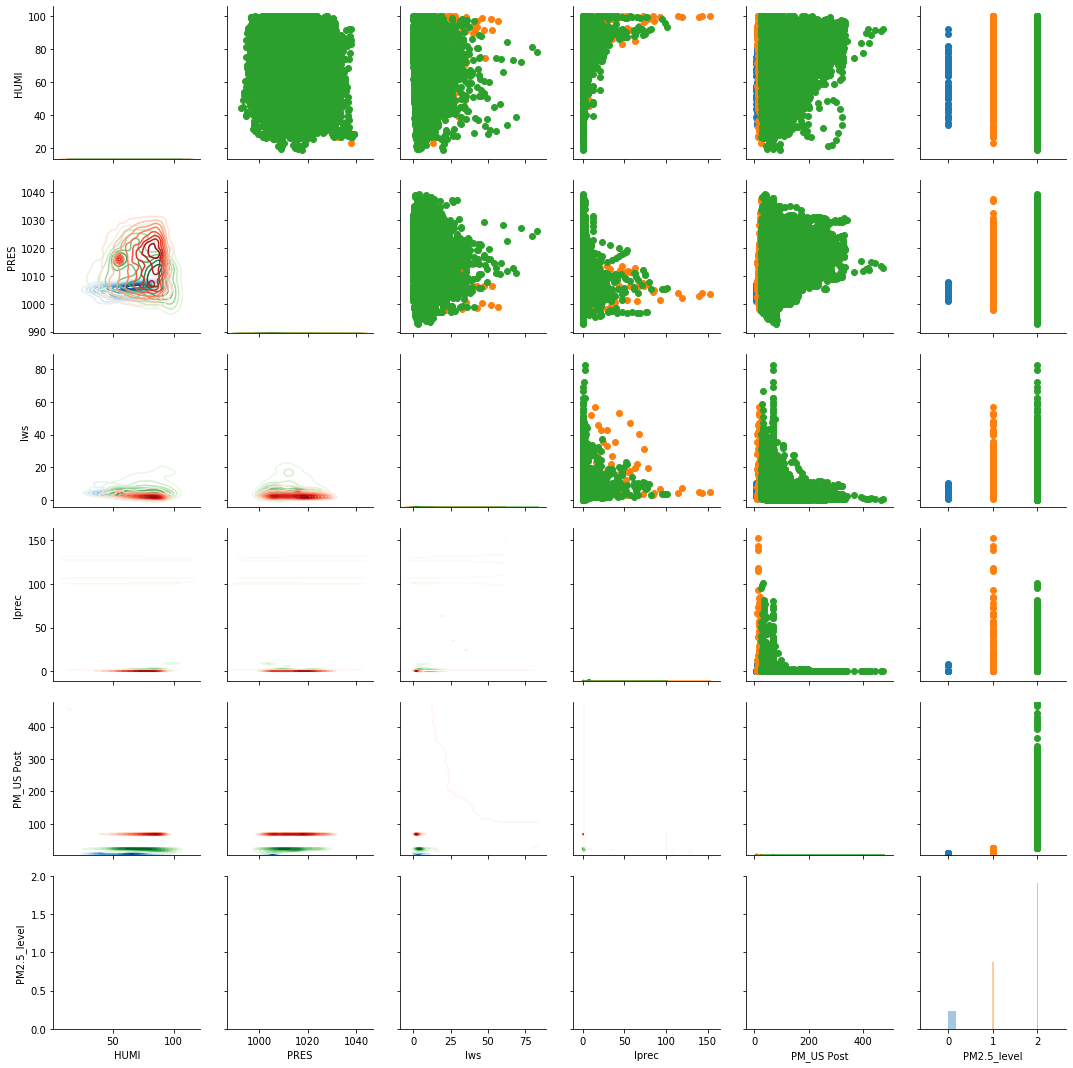

In [24]:
g = sns.PairGrid(df_cd,hue='PM2.5_level',hue_kws={"cmap":['Blues','Greens','Reds','Purples']})
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.distplot)

In [25]:
result = df_bj.append(df_cd, ignore_index=False, sort=False)
result

,Time,HUMI,PRES,Iws,Iprec,PM_US Post,PM2.5_level
4,2010-01-01 08:00:00,45.500,1018.2,14.401,0.0,68.0,2
5,2010-01-01 10:00:00,43.700,1017.5,20.303,0.0,68.0,2
6,2010-01-01 12:00:00,40.100,1016.7,26.473,0.0,68.0,2
7,2010-01-01 14:00:00,35.700,1016.0,28.037,0.0,68.0,2
8,2010-01-01 16:00:00,32.400,1015.6,24.459,0.0,68.0,2
...,...,...,...,...,...,...,...
26287,2015-12-31 14:00:00,88.123,1030.2,1.300,0.0,244.7,2
26288,2015-12-31 16:00:00,85.579,1029.5,2.000,0.0,255.3,2
26289,2015-12-31 18:00:00,85.579,1028.7,2.000,0.0,267.5,2
26290,2015-12-31 20:00:00,85.579,1027.9,2.200,0.0,266.4,2


In [26]:
result = result.sort_values(by=['Time'])

In [27]:
count = label_count(result)
print(count)

[96, 1058, 51422, 0]


In [28]:
df = result[['Time', 'HUMI','PRES','Iws','Iprec','PM2.5_level']]
df_feature = df[df.columns[1:5]]
df_feature

,HUMI,PRES,Iws,Iprec
4,45.500,1018.2,14.401,0.0
4,88.823,1020.9,1.000,0.0
5,43.700,1017.5,20.303,0.0
5,88.837,1020.7,1.000,0.0
6,40.100,1016.7,26.473,0.0
...,...,...,...,...
26289,43.700,1031.9,8.584,0.0
26290,85.579,1027.9,2.200,0.0
26290,48.000,1030.9,4.019,0.0
26291,56.100,1030.3,4.196,0.0


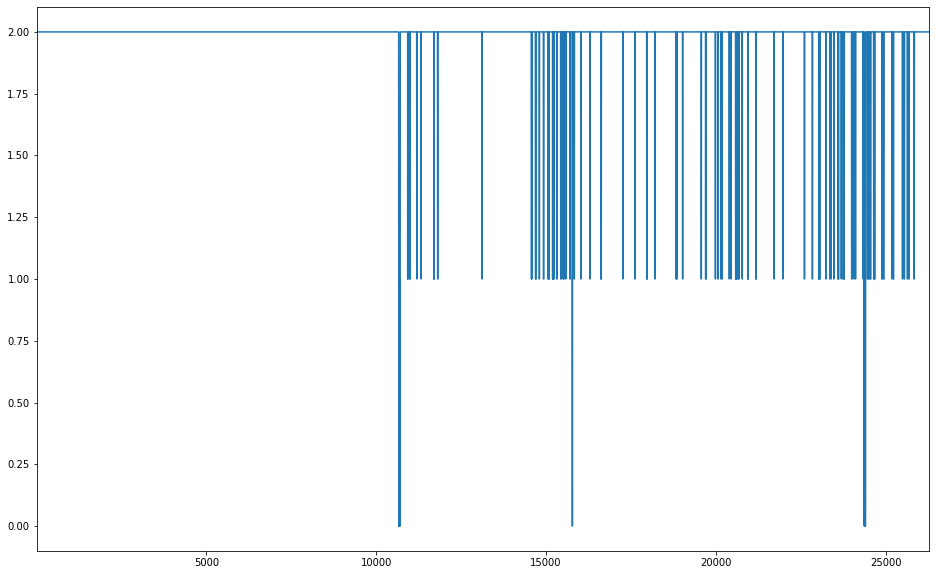

In [29]:
df_labels = df['PM2.5_level']
df_labels.plot(figsize=(16, 10),)

#### Normalizing data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer(key, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3464: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

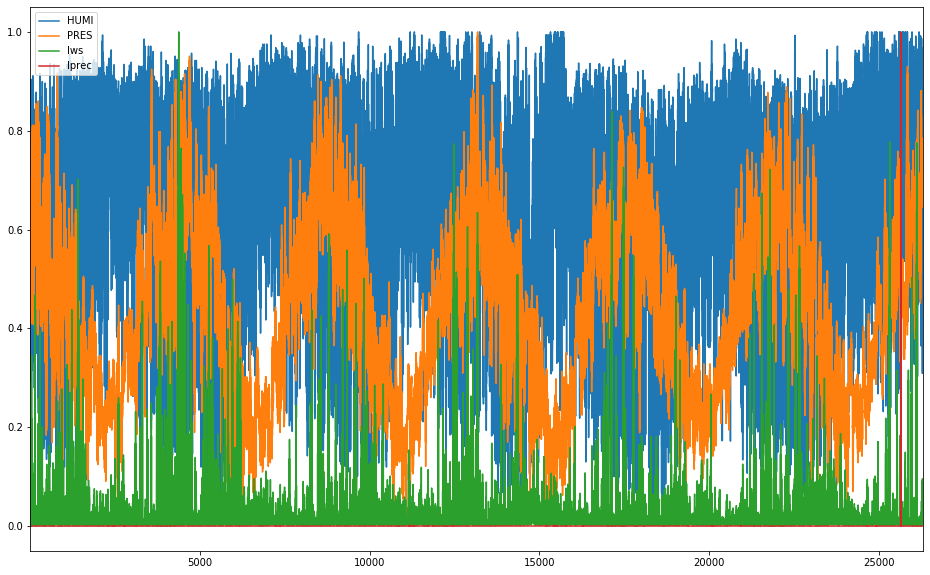

In [30]:
scaler = preprocessing.MinMaxScaler() #Standardized Norm
df_feature[:] = scaler.fit_transform(df_feature)

df_feature.plot(figsize=(16, 10),)

In [31]:
df_feature

,HUMI,PRES,Iws,Iprec
4,0.438723,0.481132,0.025782,0.0
4,0.884892,0.532075,0.001790,0.0
5,0.420185,0.467925,0.036349,0.0
5,0.885036,0.528302,0.001790,0.0
6,0.383110,0.452830,0.047395,0.0
...,...,...,...,...
26289,0.420185,0.739623,0.015368,0.0
26290,0.851483,0.664151,0.003939,0.0
26290,0.464470,0.720755,0.007195,0.0
26291,0.547889,0.709434,0.007512,0.0


#### 1.3.4 Convert sample-based data to timeseries data format 

In [32]:
from scipy import stats
from keras.utils import to_categorical
timestep = 4
stride = 2
y = []
X = []
for i in range(4,len(df)-timestep+1,stride):
    feature = df_feature.iloc[i: i+timestep].to_numpy()
    label = df_labels.iloc[i: i+timestep].to_numpy()
    mode_values, _ = stats.mode(label)#vote majority 
    label = mode_values[0] 
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)
y = to_categorical(y, 3) # to one hot encoding
X.shape,y.shape

Using TensorFlow backend.


((26285, 4, 4), (26285, 3))

#### Train Test validation split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.33, random_state=42, )

### ตอนที่ 2: การทดลองสร้าง สอน และ ทดสอบโมเดล เพื่อดูค่าความแม่นยำเบื้องต้นของแต่ละโมเดล (CNN, LSTM) 

In [34]:
from keras import Sequential
from keras.layers import Conv2D, LSTM, Dense, Dropout, Flatten, BatchNormalization, Reshape,MaxPooling2D
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [35]:
Input_shape = X_train.shape[1:]
Input_shape

(4, 4)

In [36]:
Output_shape = y_train.shape[1]
Output_shape

3

#### keras CNN

In [37]:

def cnn_2d():
    model = Sequential()
    #L1
    model.add(Conv2D(6,kernel_size=4, activation='relu', input_shape=Input_shape + (1, ), padding='same'))
    #l2
#     model.add(Conv2D(4,kernel_size=4, activation='relu', input_shape=Input_shape, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) 
    model.add(Dense(5 , activation= 'relu'))
    model.add(Dense(Output_shape, activation='sigmoid'))
    return model
cnn_2d().summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 4, 4, 6)           102       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 6)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 125       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


#### keras LSTM:

In [38]:
def lstm():
    model = Sequential()
    #l1
    model.add(LSTM(8, activation='relu',return_sequences=True, input_shape=(Input_shape)))
    model.add(Dropout(0.2))
    #l2
    model.add(LSTM(6,activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(5 , activation= 'relu'))
    model.add(Dense(Output_shape, activation='sigmoid'))
    return model
lstm().summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4, 8)              416       
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 8)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 6)                 360       
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 35        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 18        
Total params: 829
Trainable params: 829
Non-trainable params: 0
________________________________________________________

In [39]:
Input_shape

(4, 4)

#### Train model

In [40]:
cnn2D_model = cnn_2d()
cnn2D_model.compile( loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy']) 
history = cnn2D_model.fit(np.expand_dims(X_train, axis=3), y_train, validation_data=(
    np.expand_dims(X_val, axis=3), y_val), epochs=30, batch_size=8)

Train on 11798 samples, validate on 5812 samples
Epoch 1/30
11798/11798 [==============================] - 14s 1ms/step - loss: 0.2098 - accuracy: 0.9688 - val_loss: 0.1255 - val_accuracy: 0.9738
Epoch 2/30
11798/11798 [==============================] - 12s 1ms/step - loss: 0.1304 - accuracy: 0.9729 - val_loss: 0.1251 - val_accuracy: 0.9738
Epoch 3/30
11798/11798 [==============================] - 13s 1ms/step - loss: 0.1302 - accuracy: 0.9729 - val_loss: 0.1249 - val_accuracy: 0.9738
Epoch 4/30
11798/11798 [==============================] - 14s 1ms/step - loss: 0.1294 - accuracy: 0.9729 - val_loss: 0.1257 - val_accuracy: 0.9738
Epoch 5/30
11798/11798 [==============================] - 14s 1ms/step - loss: 0.1291 - accuracy: 0.9729 - val_loss: 0.1247 - val_accuracy: 0.9738
Epoch 6/30
11798/11798 [==============================] - 11s 972us/step - loss: 0.1292 - accuracy: 0.9729 - val_loss: 0.1252 - val_accuracy: 0.9738
Epoch 7/30
11798/11798 [==============================] - 14s 1ms/s

In [41]:
y_pred = cnn2D_model.predict(np.expand_dims(X_test, axis=3))
y_pred = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00       194
           2       0.98      1.00      0.99      8464

    accuracy                           0.98      8675
   macro avg       0.33      0.33      0.33      8675
weighted avg       0.95      0.98      0.96      8675



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


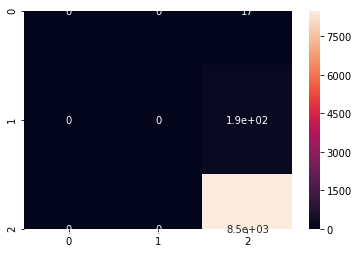

In [42]:
print(classification_report(y_true, y_pred))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)

In [43]:
X_train.shape

(11798, 4, 4)

In [44]:
lstm_model = lstm()
lstm_model.compile( loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy']) 
history = lstm_model.fit(X_train, y_train, validation_data=(
    X_val, y_val), epochs=30, batch_size=8)

Train on 11798 samples, validate on 5812 samples
Epoch 1/30
11798/11798 [==============================] - 1429s 121ms/step - loss: 0.2541 - accuracy: 0.9692 - val_loss: 0.1291 - val_accuracy: 0.9738
Epoch 2/30
11798/11798 [==============================] - 11s 967us/step - loss: 0.1413 - accuracy: 0.9729 - val_loss: 0.1276 - val_accuracy: 0.9738
Epoch 3/30
11798/11798 [==============================] - 11s 928us/step - loss: 0.1375 - accuracy: 0.9729 - val_loss: 0.1269 - val_accuracy: 0.9738
Epoch 4/30
11798/11798 [==============================] - 11s 934us/step - loss: 0.1351 - accuracy: 0.9729 - val_loss: 0.1260 - val_accuracy: 0.9738
Epoch 5/30
11798/11798 [==============================] - 11s 932us/step - loss: 0.1322 - accuracy: 0.9729 - val_loss: 0.1248 - val_accuracy: 0.9738
Epoch 6/30
11798/11798 [==============================] - 11s 928us/step - loss: 0.1327 - accuracy: 0.9729 - val_loss: 0.1255 - val_accuracy: 0.9738
Epoch 7/30
11798/11798 [==============================]

In [46]:
y_pred = lstm_model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00       194
           2       0.98      1.00      0.99      8464

    accuracy                           0.98      8675
   macro avg       0.33      0.33      0.33      8675
weighted avg       0.95      0.98      0.96      8675



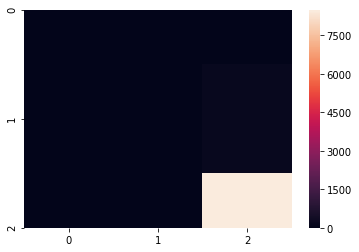

In [47]:
print(classification_report(y_true, y_pred))
sns.heatmap(confusion_matrix(y_true, y_pred))

In [48]:
accuracy_score(y_true, y_pred, normalize=False)

8464